## Simplest Autoencoder

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

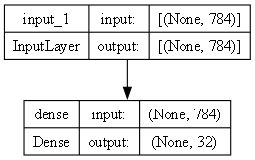

In [3]:
# plot_model autoencoder

from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder.png',dpi=80, show_shapes=True)
plot_model(encoder, to_file='encoder.png',dpi=80, show_shapes=True)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_autoencoder", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[checkpoint])

Epoch 1/50
219/235 [==========================>...] - ETA: 0s - loss: 0.2809
Epoch 1: val_loss improved from inf to 0.18771, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 4ms/step - loss: 0.2751 - val_loss: 0.1877
Epoch 2/50
218/235 [==========================>...] - ETA: 0s - loss: 0.1711
Epoch 2: val_loss improved from 0.18771 to 0.15343, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1700 - val_loss: 0.1534
Epoch 3/50
232/235 [============================>.] - ETA: 0s - loss: 0.1445
Epoch 3: val_loss improved from 0.15343 to 0.13379, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1444 - val_loss: 0.1338
Epoch 4/50
222/235 [===========================>..] - ETA: 0s - loss: 0.1289
Epoch 4: val_loss improved from 0.13379 to 0.12134, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1285 - val_loss: 0.1213
Epoch 5/50
234/235 [============================>.] - ETA: 0s - loss: 0.1185
Epoch 5: val_loss improved from 0.12134 to 0.11332, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1185 - val_loss: 0.1133
Epoch 6/50
220/235 [===========================>..] - ETA: 0s - loss: 0.1118
Epoch 6: val_loss improved from 0.11332 to 0.10743, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1116 - val_loss: 0.1074
Epoch 7/50
215/235 [==========================>...] - ETA: 0s - loss: 0.1065
Epoch 7: val_loss improved from 0.10743 to 0.10293, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1064 - val_loss: 0.1029
Epoch 8/50
230/235 [============================>.] - ETA: 0s - loss: 0.1024
Epoch 8: val_loss improved from 0.10293 to 0.09943, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.1023 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - ETA: 0s - loss: 0.0994
Epoch 9: val_loss improved from 0.09943 to 0.09694, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0994 - val_loss: 0.0969
Epoch 10/50
233/235 [============================>.] - ETA: 0s - loss: 0.0974
Epoch 10: val_loss improved from 0.09694 to 0.09529, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0953
Epoch 11/50
212/235 [==========================>...] - ETA: 0s - loss: 0.0960
Epoch 11: val_loss improved from 0.09529 to 0.09432, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0961 - val_loss: 0.0943
Epoch 12/50
233/235 [============================>.] - ETA: 0s - loss: 0.0952
Epoch 12: val_loss improved from 0.09432 to 0.09367, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0952 - val_loss: 0.0937
Epoch 13/50
212/235 [==========================>...] - ETA: 0s - loss: 0.0947
Epoch 13: val_loss improved from 0.09367 to 0.09321, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0947 - val_loss: 0.0932
Epoch 14/50
221/235 [===========================>..] - ETA: 0s - loss: 0.0943
Epoch 14: val_loss improved from 0.09321 to 0.09292, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0943 - val_loss: 0.0929
Epoch 15/50
214/235 [==========================>...] - ETA: 0s - loss: 0.0941
Epoch 15: val_loss improved from 0.09292 to 0.09262, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0940 - val_loss: 0.0926
Epoch 16/50
229/235 [============================>.] - ETA: 0s - loss: 0.0939
Epoch 16: val_loss improved from 0.09262 to 0.09246, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 17/50
217/235 [==========================>...] - ETA: 0s - loss: 0.0937
Epoch 17: val_loss improved from 0.09246 to 0.09243, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 18/50
229/235 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 18: val_loss improved from 0.09243 to 0.09234, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0936 - val_loss: 0.0923
Epoch 19/50
220/235 [===========================>..] - ETA: 0s - loss: 0.0934
Epoch 19: val_loss improved from 0.09234 to 0.09228, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0934 - val_loss: 0.0923
Epoch 20/50
212/235 [==========================>...] - ETA: 0s - loss: 0.0934
Epoch 20: val_loss improved from 0.09228 to 0.09211, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0934 - val_loss: 0.0921
Epoch 21/50
228/235 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 21: val_loss did not improve from 0.09211
235/235 [==============================] - 1s 3ms/step - loss: 0.0933 - val_loss: 0.0921
Epoch 22/50
232/235 [============================>.] - ETA: 0s - loss: 0.0932
Epoch 22: val_loss improved from 0.09211 to 0.09202, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 4ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 23/50
216/235 [==========================>...] - ETA: 0s - loss: 0.0932
Epoch 23: val_loss improved from 0.09202 to 0.09196, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 24/50
222/235 [===========================>..] - ETA: 0s - loss: 0.0931
Epoch 24: val_loss improved from 0.09196 to 0.09185, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0931 - val_loss: 0.0919
Epoch 25/50
219/235 [==========================>...] - ETA: 0s - loss: 0.0931
Epoch 25: val_loss did not improve from 0.09185
235/235 [==============================] - 1s 3ms/step - loss: 0.0931 - val_loss: 0.0919
Epoch 26/50
224/235 [===========================>..] - ETA: 0s - loss: 0.0930
Epoch 26: val_loss did not improve from 0.09185
235/235 [==============================] - 1s 3ms/step - loss: 0.0930 - val_loss: 0.0920
Epoch 27/50
219/235 [==========================>...] - ETA: 0s - loss: 0.0930
Epoch 27: val_loss improved from 0.09185 to 0.09182, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0930 - val_loss: 0.0918
Epoch 28/50
223/235 [===========================>..] - ETA: 0s - loss: 0.0930
Epoch 28: val_loss did not improve from 0.09182
235/235 [==============================] - 1s 3ms/step - loss: 0.0930 - val_loss: 0.0919
Epoch 29/50
219/235 [==========================>...] - ETA: 0s - loss: 0.0930
Epoch 29: val_loss improved from 0.09182 to 0.09181, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0929 - val_loss: 0.0918
Epoch 30/50
220/235 [===========================>..] - ETA: 0s - loss: 0.0929
Epoch 30: val_loss improved from 0.09181 to 0.09176, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0929 - val_loss: 0.0918
Epoch 31/50
223/235 [===========================>..] - ETA: 0s - loss: 0.0929
Epoch 31: val_loss improved from 0.09176 to 0.09174, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 32/50
229/235 [============================>.] - ETA: 0s - loss: 0.0929
Epoch 32: val_loss improved from 0.09174 to 0.09168, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 33/50
228/235 [============================>.] - ETA: 0s - loss: 0.0928
Epoch 33: val_loss did not improve from 0.09168
235/235 [==============================] - 1s 3ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 34/50
233/235 [============================>.] - ETA: 0s - loss: 0.0928
Epoch 34: val_loss did not improve from 0.09168
235/235 [==============================] - 1s 3ms/step - loss: 0.0928 - val_loss: 0.0918
Epoch 35/50
227/235 [===========================>..] - ETA: 0s - loss: 0.0928
Epoch 35: val_loss improved from 0.09168 to 0.09167, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 36/50
217/235 [==========================>...] - ETA: 0s - loss: 0.0928
Epoch 36: val_loss did not improve from 0.09167
235/235 [==============================] - 1s 3ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 37/50
230/235 [============================>.] - ETA: 0s - loss: 0.0928
Epoch 37: val_loss did not improve from 0.09167
235/235 [==============================] - 1s 3ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 38/50
229/235 [============================>.] - ETA: 0s - loss: 0.0927
Epoch 38: val_loss improved from 0.09167 to 0.09163, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 39/50
229/235 [============================>.] - ETA: 0s - loss: 0.0927
Epoch 39: val_loss did not improve from 0.09163
235/235 [==============================] - 1s 3ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 40/50
215/235 [==========================>...] - ETA: 0s - loss: 0.0927
Epoch 40: val_loss improved from 0.09163 to 0.09162, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 41/50
232/235 [============================>.] - ETA: 0s - loss: 0.0927
Epoch 41: val_loss improved from 0.09162 to 0.09160, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 42/50
215/235 [==========================>...] - ETA: 0s - loss: 0.0927
Epoch 42: val_loss improved from 0.09160 to 0.09155, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 43/50
218/235 [==========================>...] - ETA: 0s - loss: 0.0927
Epoch 43: val_loss did not improve from 0.09155
235/235 [==============================] - 1s 2ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 44/50
215/235 [==========================>...] - ETA: 0s - loss: 0.0926
Epoch 44: val_loss did not improve from 0.09155
235/235 [==============================] - 1s 2ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 45/50
212/235 [==========================>...] - ETA: 0s - loss: 0.0926
Epoch 45: val_loss did not improve from 0.09155
235/235 [==============================] - 1s 2ms/step - loss: 0.0926 - val_loss: 0.0916
Epoch 46/50
221/235 [===========================>..] - ETA: 0s - loss: 0.0926
Epoch 46: val_loss improved from 0.09155 to 0.09155, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 47/50
231/235 [============================>.] - ETA: 0s - loss: 0.0926
Epoch 47: val_loss improved from 0.09155 to 0.09151, saving model to best_autoencoder
INFO:tensorflow:Assets written to: best_autoencoder\assets


INFO:tensorflow:Assets written to: best_autoencoder\assets


235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 48/50
214/235 [==========================>...] - ETA: 0s - loss: 0.0927
Epoch 48: val_loss did not improve from 0.09151
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0916
Epoch 49/50
218/235 [==========================>...] - ETA: 0s - loss: 0.0926
Epoch 49: val_loss did not improve from 0.09151
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0916
Epoch 50/50
224/235 [===========================>..] - ETA: 0s - loss: 0.0926
Epoch 50: val_loss did not improve from 0.09151
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915


In [9]:
# load the best autoencoder model
autoencoder = keras.models.load_model("best_autoencoder")

In [10]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 431us/step


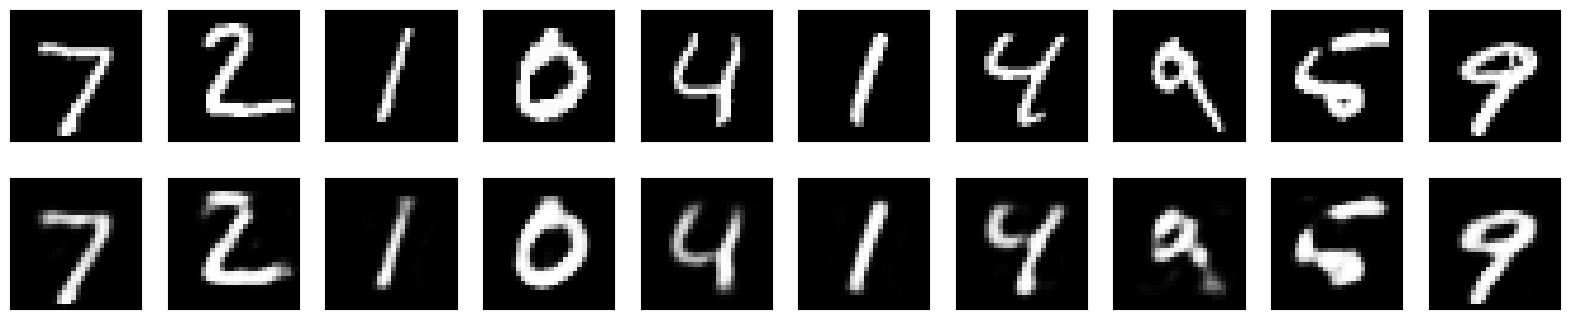

In [11]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Adding a sparsity constraint on the encoded representations

In [12]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)